In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
list(df.columns)

['booking_date',
 'bailed_out',
 'mh_treatment',
 'within_one',
 'within_two',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION 

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.mh_info

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [9]:
#Running on All the var including mental health and bail var
x_train = x_train[final_options.mh_info]
x_test = x_test[final_options.mh_info]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
38,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.6496,0.3310,0.0709,"(0.5, 0.125, 0.2)","(0.4505, 0.2253, 0.3004)","(0.3654, 0.3654, 0.3654)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6791,0.3840,2.6611,"(0.5495, 0.1374, 0.2198)","(0.5137, 0.2569, 0.3425)","(0.4341, 0.4341, 0.4341)"
97,ET,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.6679,0.3729,1.4496,"(0.5824, 0.1456, 0.233)","(0.4863, 0.2431, 0.3242)","(0.3956, 0.3956, 0.3956)"
45,Logit,"{'C': 0.1, 'penalty': 'l2'}",0.6766,0.3786,0.1675,"(0.522, 0.1305, 0.2088)","(0.4753, 0.2376, 0.3168)","(0.4217, 0.4217, 0.4217)"
114,NB,{},0.6648,0.3471,0.2043,"(1.0, 0.25, 0.4)","(0.7088, 0.3544, 0.4725)","(0.4299, 0.4299, 0.4299)"
11,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.6702,0.3830,2.6842,"(0.5495, 0.1374, 0.2198)","(0.5027, 0.2514, 0.3352)","(0.408, 0.408, 0.408)"
56,Tree,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.6683,0.3514,0.0352,"(0.478, 0.1195, 0.1912)","(0.4808, 0.2404, 0.3205)","(0.4245, 0.4245, 0.4245)"


In [12]:
best

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [10],
  'max_features': ['log2'],
  'min_samples_split': [2]}}

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
5462,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.406667,0.502986,0.993444,0.718969,1.0,0.969181,0.525180
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.392976,0.502824,0.951938,0.687963,1.0,0.968069,0.259104
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.251726,0.500721,0.963889,0.501595,1.0,0.926598,0.128199
6323,437,159.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.252619,0.501100,0.927483,0.625554,1.0,0.921364,0.240933
2877,475,1423.0,23.0,OLATHE P.D.,CITY,2500.0,SUR,1,15012300,15CR02605,...,FEMALE,KS,66061,0.392976,0.501193,0.934506,0.632925,1.0,0.891954,0.259104
5463,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.406667,0.502366,0.973458,0.715910,1.0,0.890681,0.525180
8468,591,-127.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.240119,0.501876,0.933056,0.675657,1.0,0.890322,0.201166
6324,437,-37.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.252619,0.502982,0.901036,0.732708,1.0,0.886970,0.240933
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.187976,0.501848,0.880727,0.660356,1.0,0.885364,0.240933
9732,587,0.0,37.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,3500.0,SUR,1,15008413,15CR01484,...,FEMALE,KS,66030,0.401310,0.499611,0.914032,0.500113,1.0,0.877593,0.525180


In [18]:
def plotting_curves (dataframe, feature):
    '''
    Given a dataframe, a column name, 
        displays a plot of that dataframe column distribution.
        
    Input:
        dataframe
        feature: column name (string)
        
    Return:
        displays a distribution of that variable
        
    Inspired by:
        https://seaborn.pydata.org/generated/seaborn.distplot.html
    '''
    title = feature + ' Graph'
    ax = sns.distplot(dataframe[feature])
    ax.set_title(title)


In [19]:
def value_counter (dataframe, feature):
    '''
    Given a dataframe, and feature,
        gives the number of occurrences of each value in that feature column
        
    Input:
        dataframe
        feature: string
    
    Output: dataframe
    '''
    return dataframe[feature].value_counts()

In [20]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

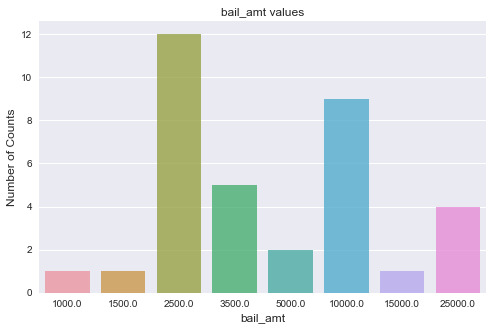

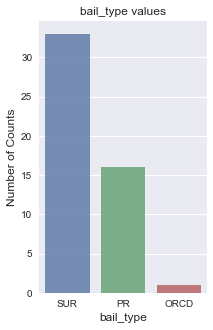

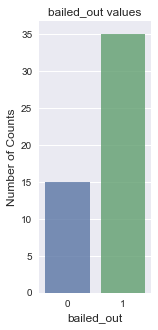

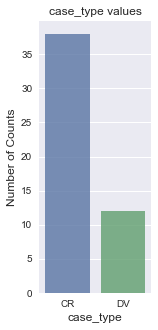

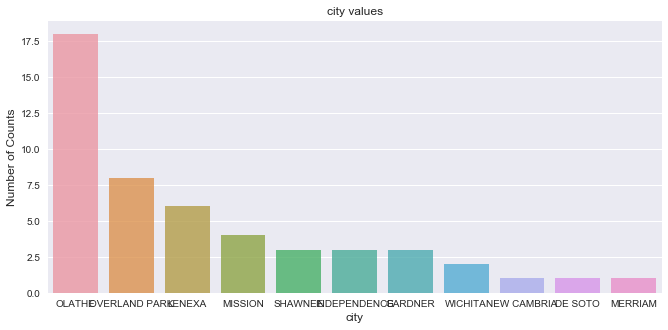

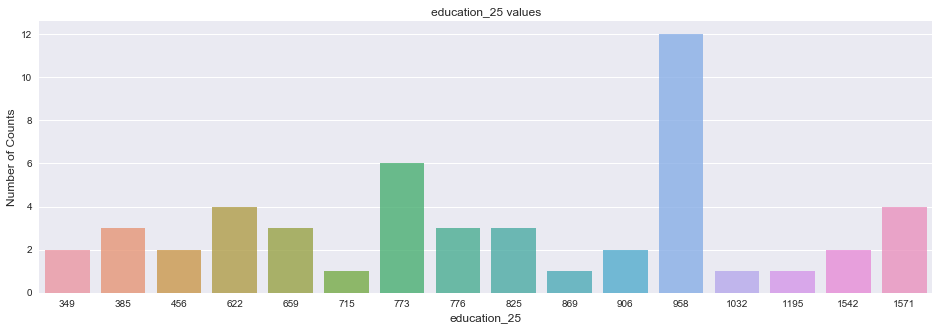

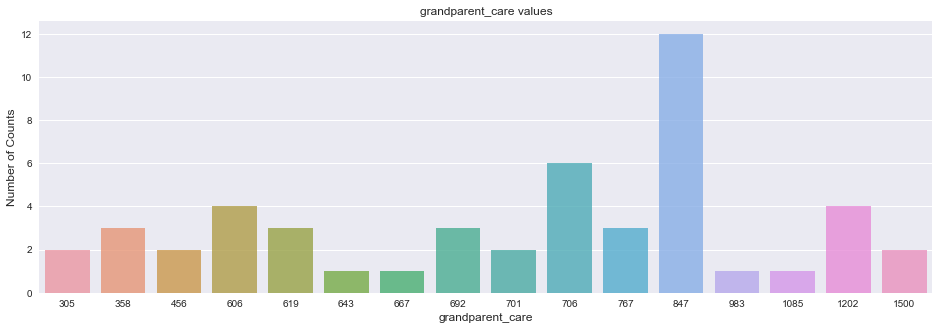

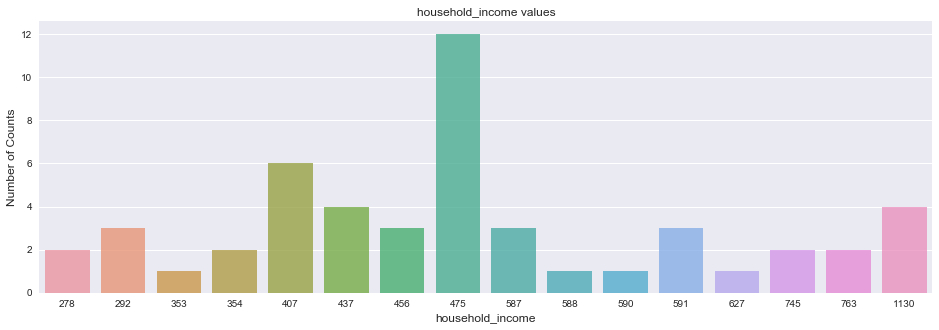

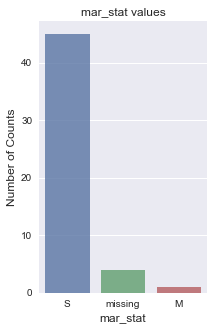

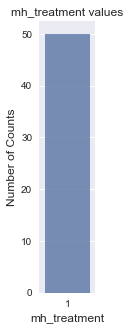

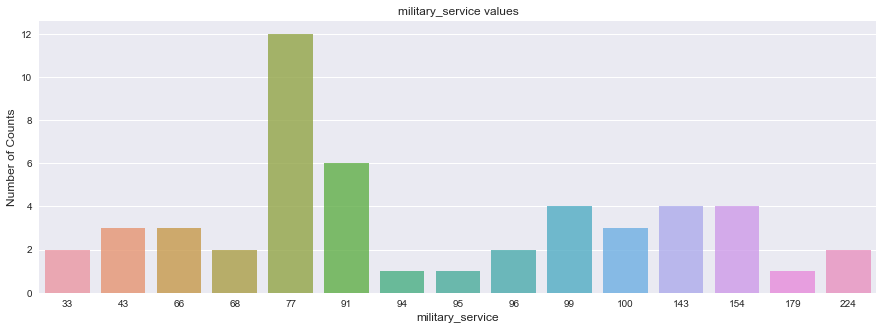

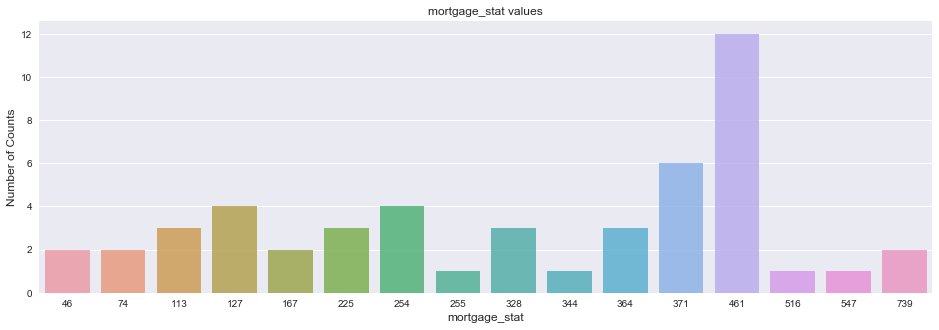

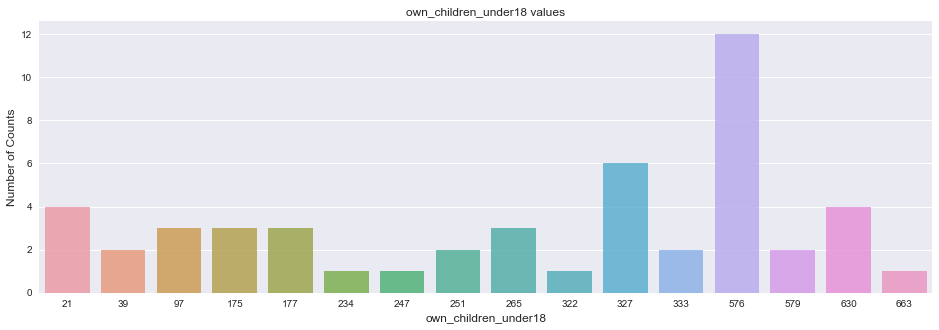

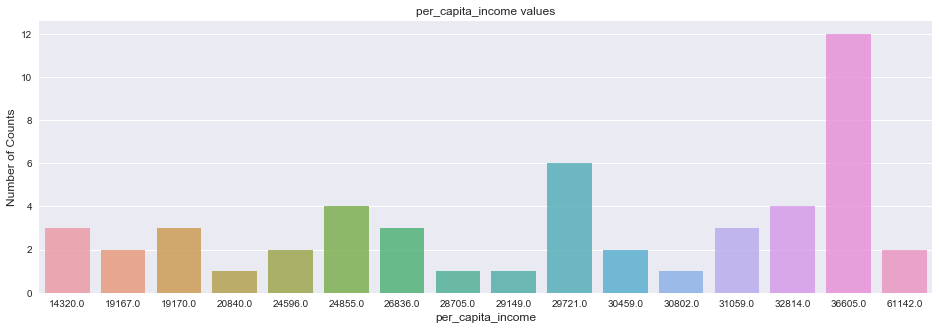

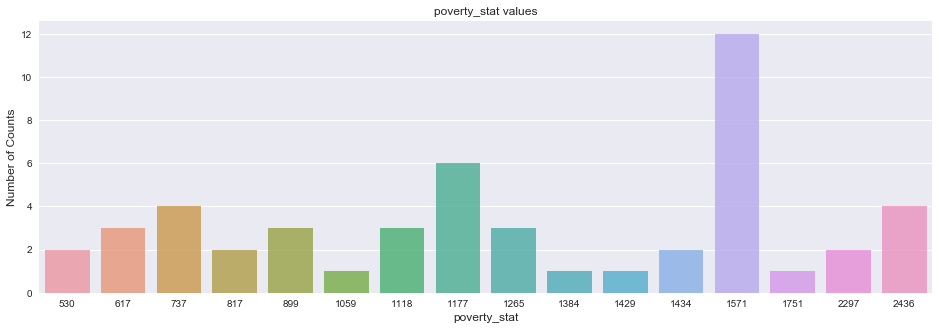

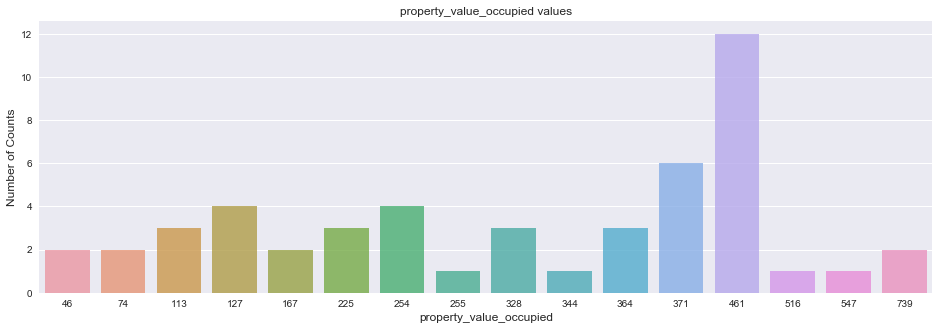

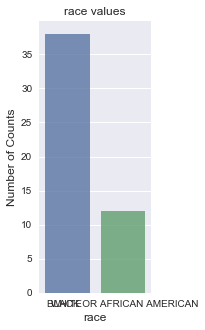

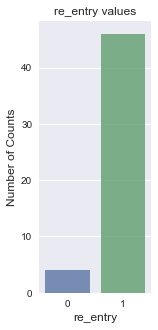

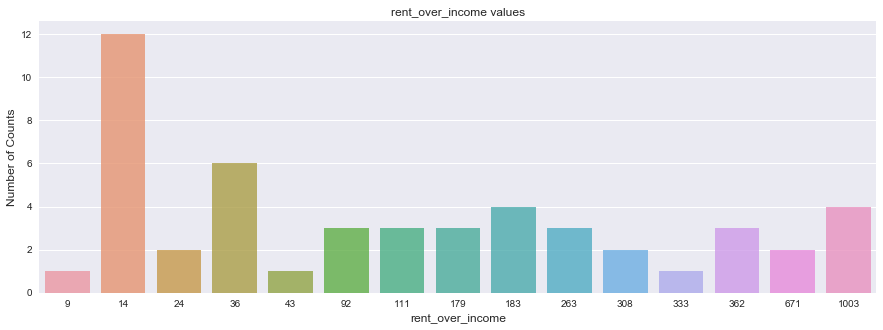

In [21]:
final_plot.plot_df(RF_df[:50], features_to_see, save=False)

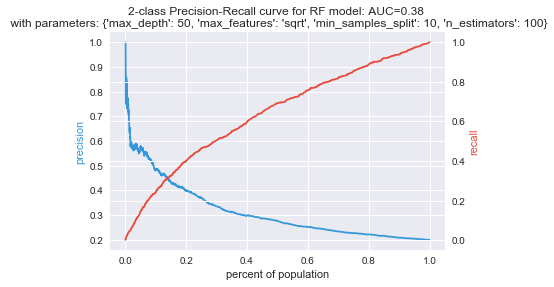

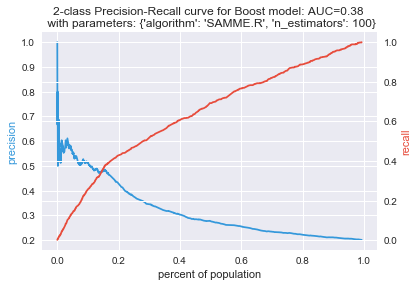

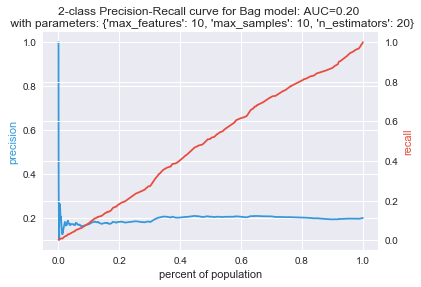

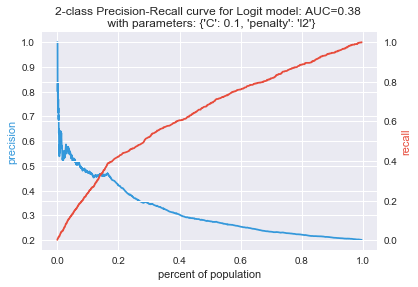

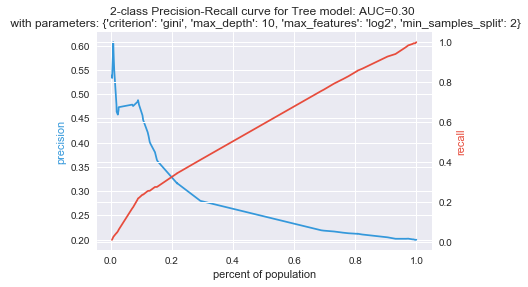

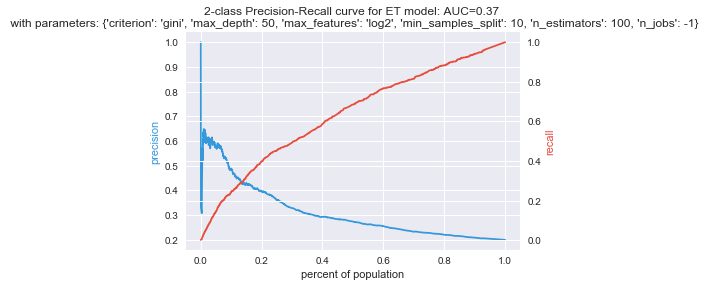

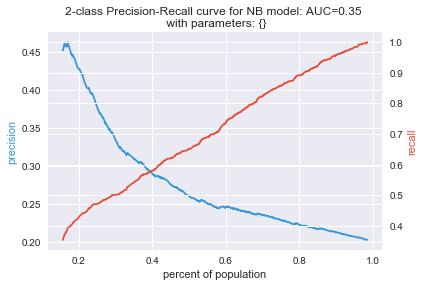

In [22]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

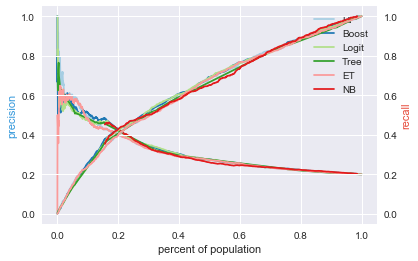

In [23]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. mh_treatment (0.133808)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.128051)
3. refferal_sourceOTHERS (0.093389)
4. refferal_sourceSELF (0.038962)
5. age_bin1 (0.025979)
6. age_bin4 (0.021523)
7. mar_statS (0.021296)
8. age_bin2 (0.019000)
9. age_bin3 (0.018294)
10. sexMALE (0.017909)
11. sexFEMALE (0.017741)
12. mar_statM (0.017480)
13. raceBLACK OR AFRICAN AMERICAN (0.015601)
14. pri_dx_valuemissing (0.015434)
15. mar_statmissing (0.015430)
16. raceWHITE (0.015315)
17. mar_statD (0.012275)
18. pri_dx_valueDEPRESSIVE DISORDER NOS (0.011676)
19. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.010027)
20. pri_dx_valueSCHIZOPHRENIC DISORDER, SCHIZO-AFFECTIVE TYPE, UNSPEC (0.007188)


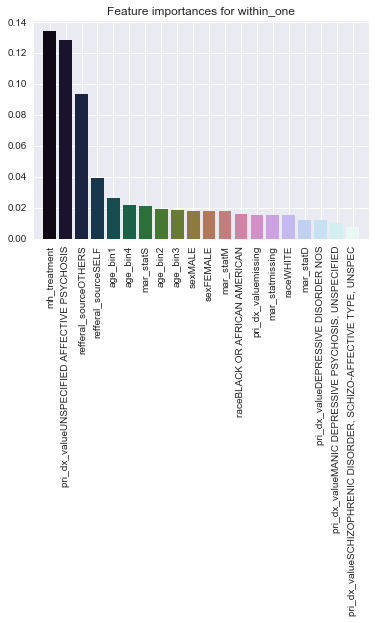

In [24]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [25]:
########Running everything on second y within two year of re-entry

In [26]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [27]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
31,Bag,"{'max_features': 5, 'max_samples': 10, 'n_esti...",0.6064,0.3400,0.1377,"(0.4011, 0.0777, 0.1302)","(0.3599, 0.1395, 0.2011)","(0.3956, 0.3067, 0.3455)"
18,Boost,"{'algorithm': 'SAMME', 'n_estimators': 100}",0.6685,0.4283,2.6727,"(0.5989, 0.1161, 0.1945)","(0.5302, 0.2055, 0.2962)","(0.5179, 0.4015, 0.4523)"
113,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.6725,0.4432,1.4488,"(0.6099, 0.1182, 0.198)","(0.5769, 0.2236, 0.3223)","(0.5, 0.3876, 0.4367)"
46,Logit,"{'C': 1, 'penalty': 'l1'}",0.6660,0.4426,1.7679,"(0.6429, 0.1246, 0.2087)","(0.5879, 0.2279, 0.3285)","(0.5055, 0.3919, 0.4415)"
114,NB,{},0.6528,0.4088,0.1746,"(1.0, 0.1938, 0.3247)","(0.7308, 0.2833, 0.4083)","(0.511, 0.3962, 0.4463)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.6731,0.4596,2.5786,"(0.6099, 0.1182, 0.198)","(0.5934, 0.23, 0.3315)","(0.5069, 0.393, 0.4427)"
72,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6629,0.4140,0.0436,"(0.7692, 0.1491, 0.2498)","(0.6374, 0.2471, 0.3561)","(0.5192, 0.4026, 0.4535)"


In [28]:
best2

{'Bag': {'max_features': [5], 'max_samples': [10], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['log2'],
  'min_samples_split': [2]}}

In [29]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [30]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [31]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.269984,0.515563,0.968047,0.877525,1.000000e+00,0.958184,1.000000
5462,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.226873,0.520799,0.994603,0.807887,1.000000e+00,0.955560,0.599738
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.286635,0.520652,0.978294,0.668773,1.000000e+00,0.951113,0.639968
7298,456,943.0,23.0,OVERLAND PARK P.D.,CITY,3500.0,PR,1,16003241,16CR00734,...,MALE,KS,66212,0.254087,0.521154,0.953584,0.837918,1.000000e+00,0.939343,0.639968
6323,437,159.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.228667,0.519283,0.952284,0.680817,1.000000e+00,0.935181,0.599738
6325,437,-37.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.245810,0.519465,0.937423,0.773048,1.000000e+00,0.932310,0.599738
5463,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.244016,0.520980,0.980071,0.777959,1.000000e+00,0.931255,0.599738
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.311230,0.522311,0.933547,0.763532,1.000000e+00,0.917500,0.639968
3293,475,0.0,23.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,10000.0,SUR,1,15009539,15DV01040,...,MALE,KS,66061,0.280540,0.522607,0.971616,0.763925,1.000000e+00,0.914561,0.639968
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.286635,0.520652,0.949861,0.613424,9.564622e-21,0.912386,1.000000


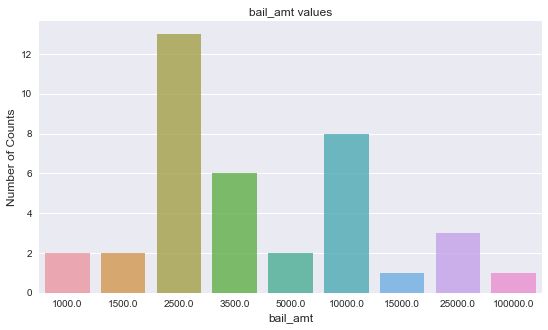

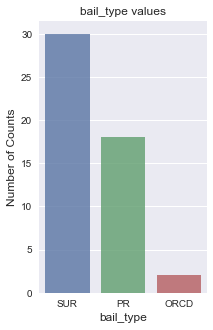

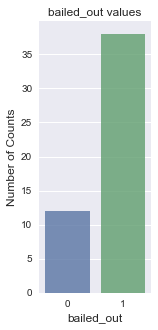

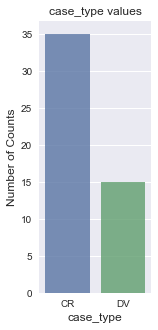

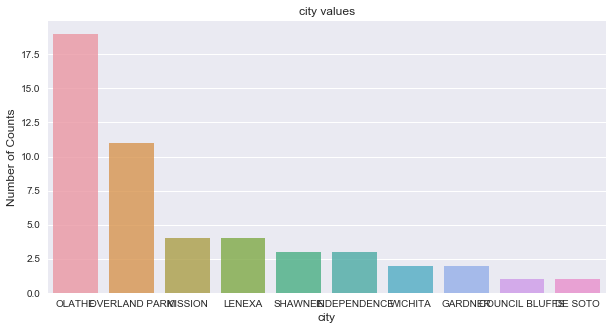

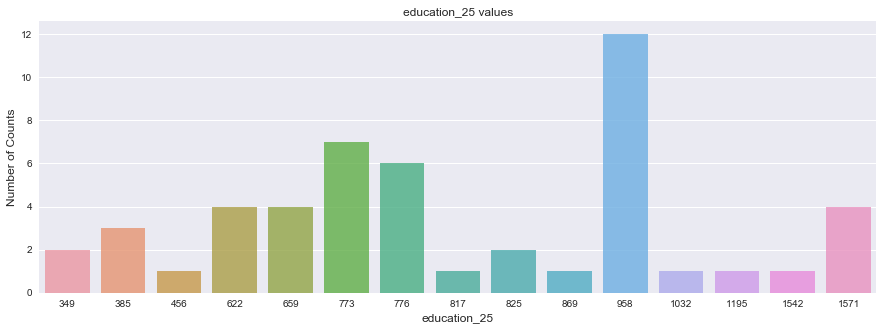

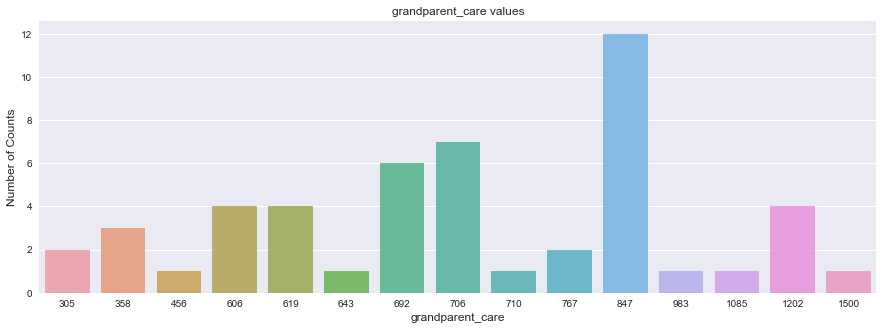

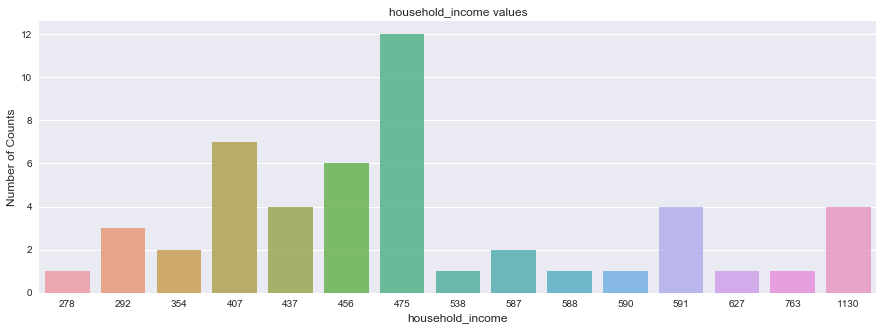

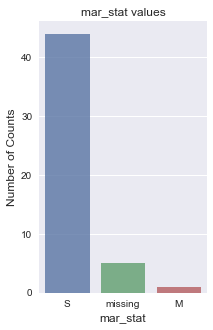

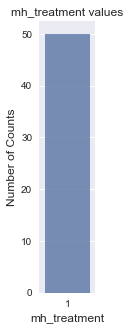

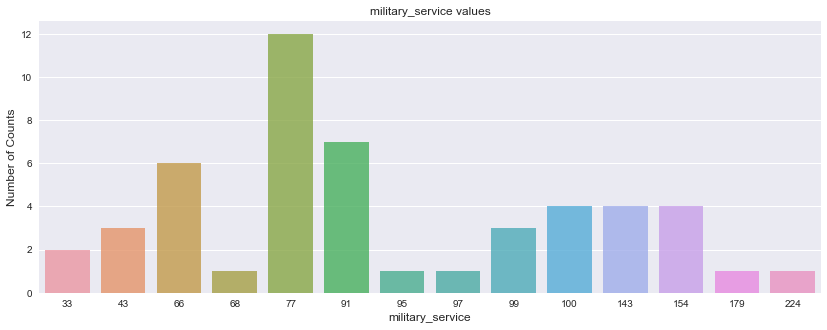

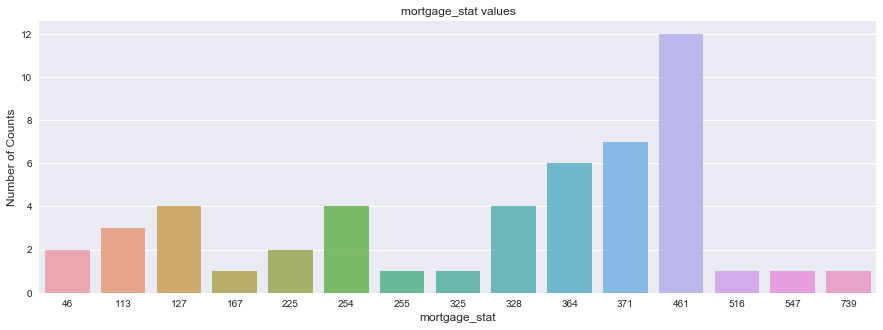

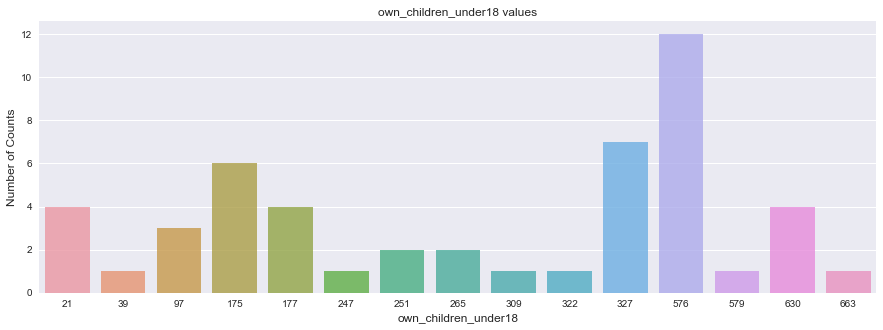

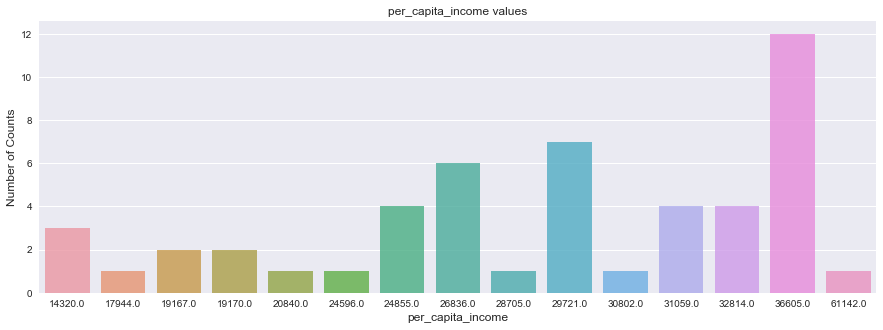

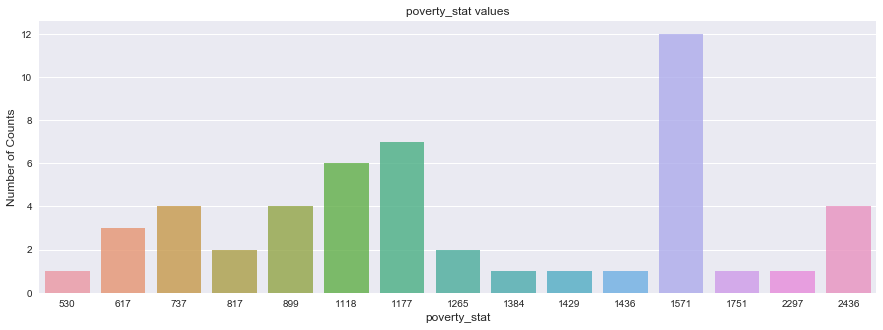

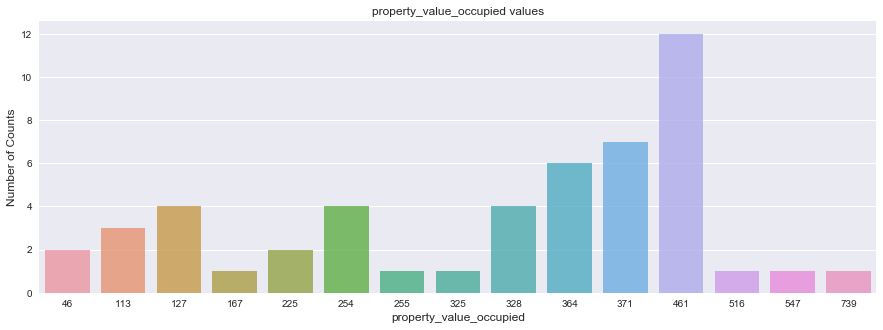

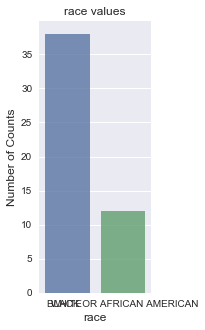

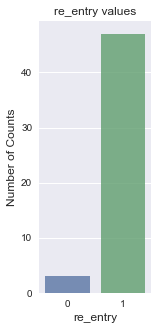

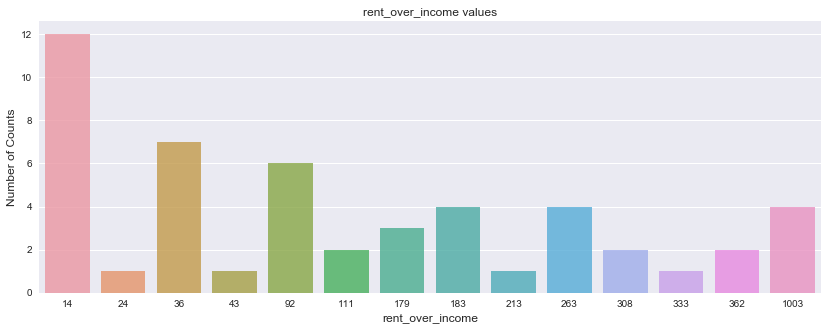

In [32]:
final_plot.plot_df(RF_df2[:50], features_to_see, save=False)

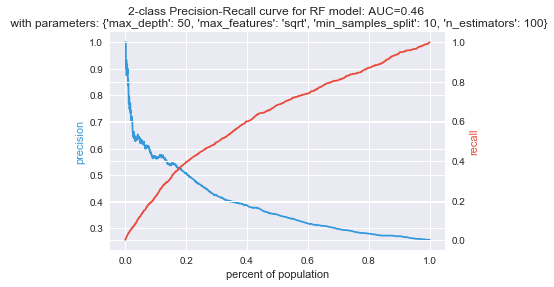

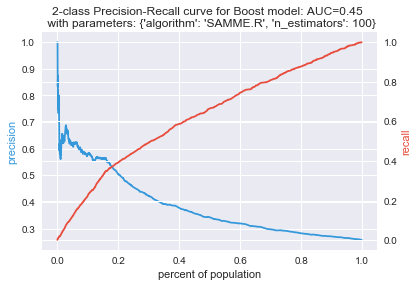

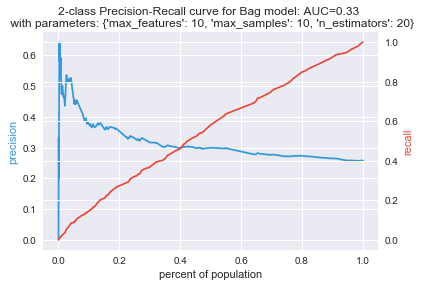

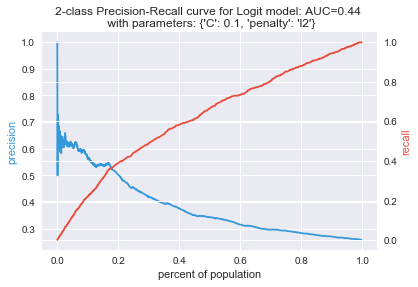

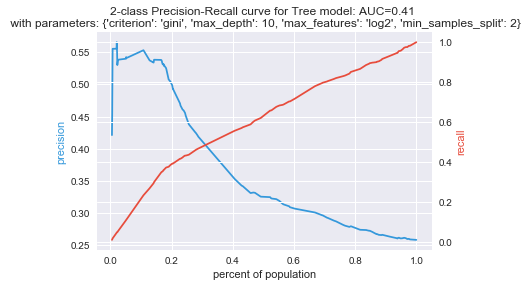

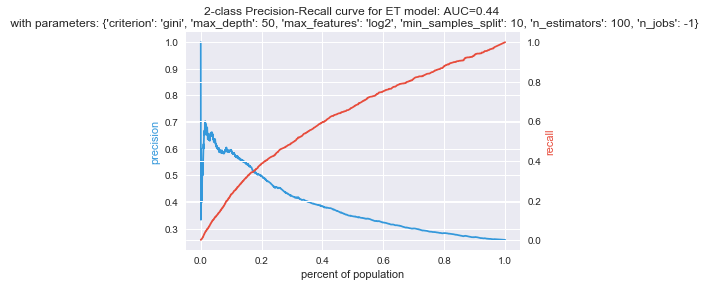

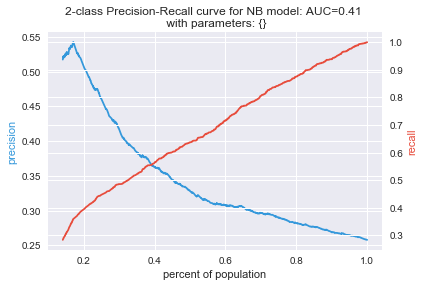

In [33]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

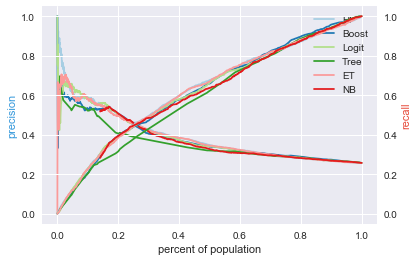

In [34]:
final_plot.plot_mult(['RF', 'Boost', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. mh_treatment (0.116990)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.082993)
3. refferal_sourceOTHERS (0.077740)
4. refferal_sourceSELF (0.032264)
5. age_bin1 (0.029800)
6. mar_statS (0.027497)
7. mar_statM (0.026558)
8. age_bin4 (0.026239)
9. sexFEMALE (0.024844)
10. sexMALE (0.024501)
11. age_bin3 (0.023420)
12. age_bin2 (0.022885)
13. raceBLACK OR AFRICAN AMERICAN (0.020711)
14. raceWHITE (0.020630)
15. mar_statmissing (0.019113)
16. mar_statD (0.017162)
17. pri_dx_valuemissing (0.011071)
18. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.009072)
19. pri_dx_valueDEPRESSIVE DISORDER NOS (0.008969)
20. per_capita_income_bin1 (0.008800)


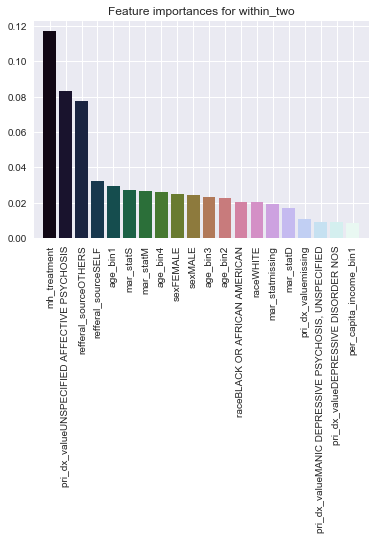

In [35]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [36]:
################Print out the Decision Tree####################

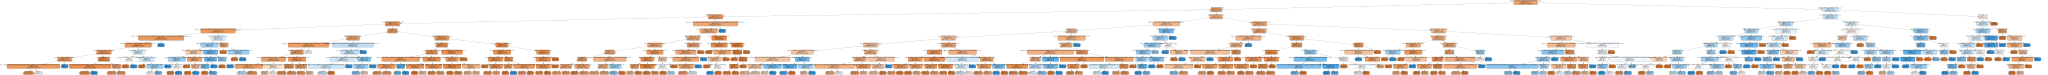

In [37]:
final_plot.print_tree(x_train, y_train["within_one"], best)